## pca-analysis

In [1]:
import matplotlib.pyplot as plt
import src.plot_utils.latex_style as lsty
from src.make_figures import make_all_figures as mif
pcm, ds = mif()

high
'mpl_params'  0.00133 s



/home/users/sithom/so-fronts/env/lib/python3.8/site-packages/pyxpcm/plot.py:45: UserWarning: pyXpcm requires seaborn installed for full plotting functionality
  warnings.warn("pyXpcm requires seaborn installed for full plotting functionality")


settings:
 cst.EXAMPLE_TIME_INDEX 40 cst.SEED 10
high
'mpl_params'  0.00063 s

'southern_ocean_axes_setup'  1.08303 s

'southern_ocean_axes_setup'  0.64030 s

'southern_ocean_axes_setup'  0.29299 s

'label_subplots'  0.00029 s

'sep_plots'  4.69665 s

high
'mpl_params'  0.00203 s

  fit.1-preprocess.1-mask: 715 ms
features_dict {'SALT': 'SALT', 'THETA': 'THETA'}
  fit.1-preprocess.2-feature_SALT.1-ravel: 1513 ms
  fit.1-preprocess.2-feature_SALT.2-interp: 8 ms
  fit.1-preprocess.2-feature_SALT.3-scale_fit: 3955 ms
  fit.1-preprocess.2-feature_SALT.4-scale_transform: 2142 ms
  fit.1-preprocess.2-feature_SALT.total: 7620 ms
  fit.1-preprocess.2-feature_THETA.1-ravel: 1380 ms
  fit.1-preprocess.2-feature_THETA.2-interp: 4 ms
  fit.1-preprocess.2-feature_THETA.3-scale_fit: 4564 ms
  fit.1-preprocess.2-feature_THETA.4-scale_transform: 3032 ms
  fit.1-preprocess.2-feature_THETA.total: 8982 ms
  fit.1-preprocess.2-feature_all.5-join: 519 ms
Fitting PCA
  fit.1-preprocess.2-feature_all.6-reduc

<Figure size 3307.09x2043.89 with 0 Axes>

<Figure size 4860x1800 with 0 Axes>

In [10]:
%matplotlib inline

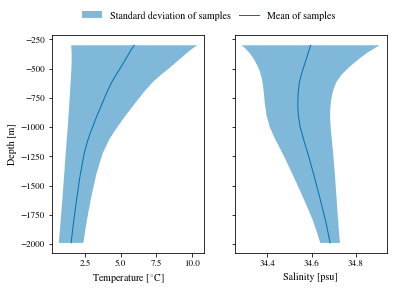

In [33]:
_, axs = plt.subplots(1, 2, sharey=True)
zs = [-x for x in range(300, 2000, 10)]
lz = len(zs)
mn = pcm._scaler["THETA"].mean_
std = np.sqrt(pcm._scaler["THETA"].var_)
axs[0].plot(mn, zs)
axs[0].set_xlabel(r"Temperature [$^{\circ}$C]")
axs[0].set_ylabel(r"Depth [m]")
axs[0].fill_betweenx(zs, mn - std, mn + std, alpha=0.5)
mn = pcm._scaler["SALT"].mean_
std = np.sqrt(pcm._scaler["SALT"].var_)
axs[1].plot(mn, zs, label="Mean of samples")
axs[1].set_xlabel(r"Salinity [psu]")
axs[1].fill_betweenx(
    zs, mn - std, mn + std, alpha=0.5, label="Standard deviation of samples"
)
axs[1].legend(
    bbox_to_anchor=(0, 1.05, 0, 0),
    loc="lower right",
    ncol=2,
    mode="expand",
    borderaxespad=0.0,
    frameon=False,
)
plt.savefig("figures/RUN_010_mean_plot.png")
plt.show()

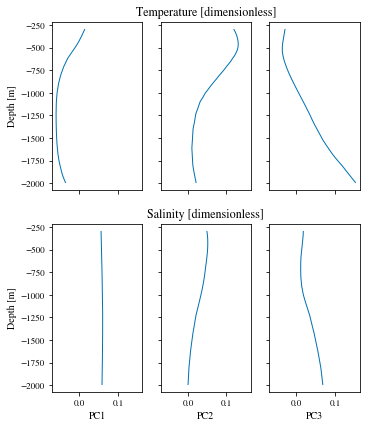

In [47]:
fig, axs = plt.subplots(2, 3, sharey=True, sharex=True)
axs[0, 0].plot(pcm._reducer["all"].components_[0, :lz], zs)
axs[0, 1].plot(pcm._reducer["all"].components_[1, :lz], zs)
axs[0, 2].plot(pcm._reducer["all"].components_[2, :lz], zs)
axs[0, 0].set_ylabel("Depth [m]")
axs[1, 0].plot(pcm._reducer["all"].components_[0, lz:], zs)
axs[1, 1].plot(pcm._reducer["all"].components_[1, lz:], zs)
axs[1, 2].plot(pcm._reducer["all"].components_[2, lz:], zs)
axs[1, 0].set_ylabel("Depth [m]")
axs[1, 0].set_xlabel("PC1")
axs[1, 1].set_xlabel("PC2")
axs[1, 2].set_xlabel("PC3")
axs[0, 1].set_title("Temperature [dimensionless]")
axs[1, 1].set_title("Salinity [dimensionless]")
lsty.set_dim(fig, fraction_of_line_width=1, ratio=(5 ** 0.5 - 1))
plt.savefig("figures/RUN_010_pca_plot.png")
plt.show()

'label_subplots'  0.00034 s



/tmp/ipykernel_21209/346010941.py:57: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


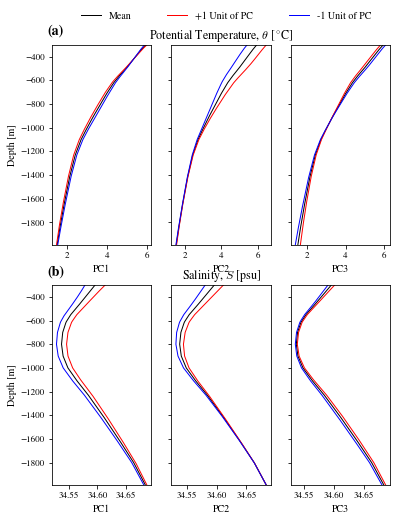

In [68]:
import src.plot_utils.gen_panels as gp
fig, axs = plt.subplots(2, 3, sharey=True)
std = np.sqrt(pcm._scaler["THETA"].var_)
mn = pcm._scaler["THETA"].mean_
axs[0, 0].plot(mn, zs, color="black", label="Mean")
axs[0, 1].plot(mn, zs, color="black")
axs[0, 2].plot(mn, zs, color="black")
axs[0, 0].plot(
    mn + std * pcm._reducer["all"].components_[0, :lz],
    zs,
    color="red",
    label="+1 Unit of PC",
)
axs[0, 1].plot(mn + std * pcm._reducer["all"].components_[1, :lz], zs, color="red")
axs[0, 2].plot(mn + std * pcm._reducer["all"].components_[2, :lz], zs, color="red")
axs[0, 0].plot(
    mn - std * pcm._reducer["all"].components_[0, :lz],
    zs,
    color="blue",
    label="-1 Unit of PC",
)
axs[0, 1].plot(mn - std * pcm._reducer["all"].components_[1, :lz], zs, color="blue")
axs[0, 2].plot(mn - std * pcm._reducer["all"].components_[2, :lz], zs, color="blue")
axs[0, 0].set_ylim(min(zs), max(zs))
axs[0, 0].set_ylabel("Depth [m]")
axs[0, 0].set_xlabel("PC1")
axs[0, 1].set_xlabel("PC2")
axs[0, 2].set_xlabel("PC3")
std = np.sqrt(pcm._scaler["SALT"].var_)
mn = pcm._scaler["SALT"].mean_
axs[1, 0].plot(mn, zs, color="black")
axs[1, 1].plot(mn, zs, color="black")
axs[1, 2].plot(mn, zs, color="black")
axs[1, 0].plot(mn + std * pcm._reducer["all"].components_[0, lz:], zs, color="red")
axs[1, 1].plot(mn + std * pcm._reducer["all"].components_[1, lz:], zs, color="red")
axs[1, 2].plot(mn + std * pcm._reducer["all"].components_[2, lz:], zs, color="red")
axs[1, 0].plot(mn - std * pcm._reducer["all"].components_[0, lz:], zs, color="blue")
axs[1, 1].plot(mn - std * pcm._reducer["all"].components_[1, lz:], zs, color="blue")
axs[1, 2].plot(mn - std * pcm._reducer["all"].components_[2, lz:], zs, color="blue")
axs[1, 0].set_ylabel("Depth [m]")
axs[1, 0].set_xlabel("PC1")
axs[1, 1].set_xlabel("PC2")
axs[1, 2].set_xlabel("PC3")
axs[1, 0].set_ylim(min(zs), max(zs))
axs[0, 1].set_title(r"Potential Temperature, $\theta$ [$^{\circ}$C]")
axs[1, 1].set_title(r"Salinity, $S$ [psu]")
axs[0, 0].legend(
    bbox_to_anchor=(0.25, 1.1, 3, 0),
    loc="lower right",
    ncol=3,
    mode="expand",
    borderaxespad=0.0,
    frameon=False,
)
lsty.set_dim(fig, fraction_of_line_width=1.1, ratio=(5 ** 0.5 - 1)+0.1)
gp.label_subplots([axs[0,0], axs[1, 0]],x_pos=-0.05, y_pos=1.1, fontsize=14)
plt.tight_layout()
plt.savefig("figures/RUN_010_pca_real_space_plot.png", bbox_inches="tight")
plt.show()